In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Unsupervised Learning/Clustering/K-means Clustering/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum().any()

False

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'annual_income','Spending Score (1-100)':'score'},inplace=True)

In [8]:
df.head()

,CustomerID,gender,age,annual_income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Figure size 864x720 with 0 Axes>

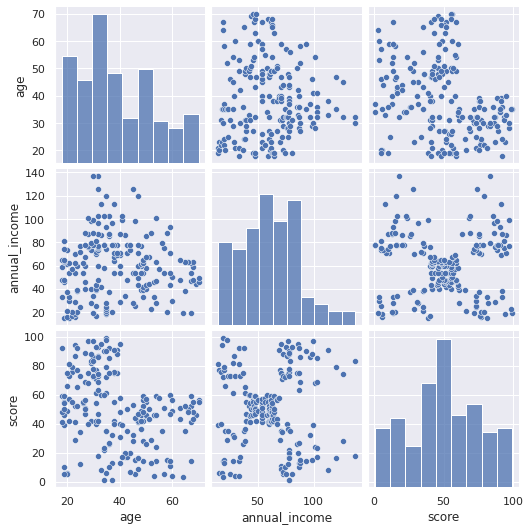

In [9]:
# See the data distribuation using pairplot
plt.figure(figsize=(12,10))
sns.set(font_scale =1)
sns.pairplot(data=df,vars=['age','annual_income','score'],palette='hot')
plt.show()

In [14]:
kmeans_model = KMeans(n_clusters=5)

In [15]:
# For income and score
kmeans_model.fit(df[['annual_income','score']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans_model.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

In [17]:
kmeans_model.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [18]:
df['income_cluster'] = kmeans_model.labels_

In [19]:
df

,CustomerID,gender,age,annual_income,score,income_cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [21]:
df.income_cluster.value_counts(ascending=True)

0    22
3    23
1    35
2    39
4    81
Name: income_cluster, dtype: int64

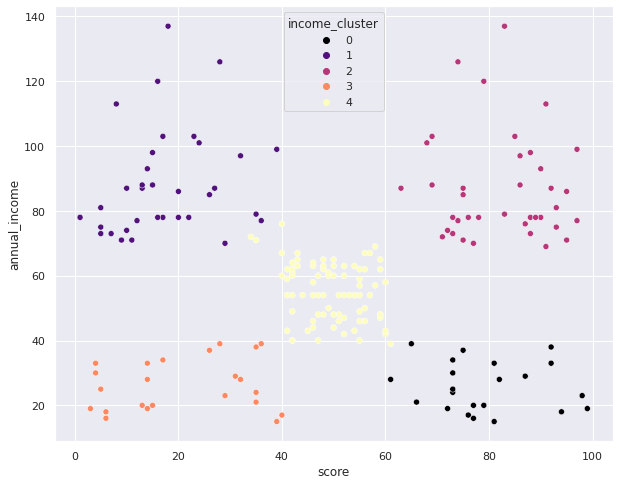

In [24]:
# Now see the income_cluster using scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(x='score',y='annual_income',hue='income_cluster',data=df,palette='magma')
plt.show()

In [25]:
kmeans_model2 = KMeans(n_clusters=2)

In [26]:
kmeans_model2.fit(df[['age','score']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
kmeans_model2.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [28]:
df['age_cluster'] = kmeans_model2.labels_

In [29]:
df.head()

,CustomerID,gender,age,annual_income,score,income_cluster,age_cluster
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,3,1


In [30]:
df.age_cluster.value_counts()

1    115
0     85
Name: age_cluster, dtype: int64

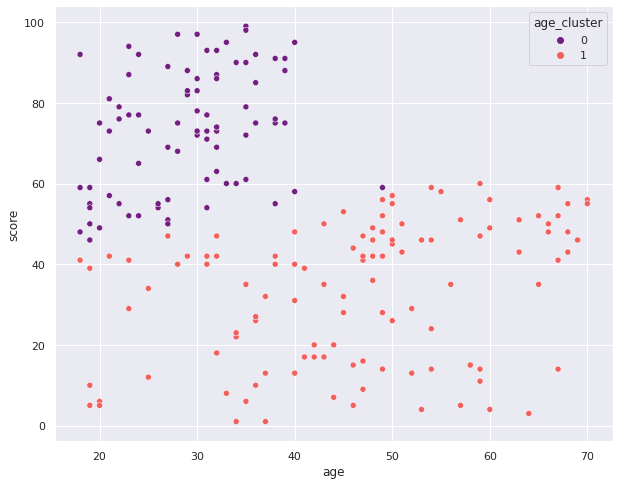

In [31]:
# Now see the age_cluster using scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(x='age',y='score',hue='age_cluster',data=df,palette='magma')
plt.show()

In [33]:
# applied Elbow method
k_range = range(1,15)
wcss = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['annual_income','score']])
  wcss.append(km.inertia_)

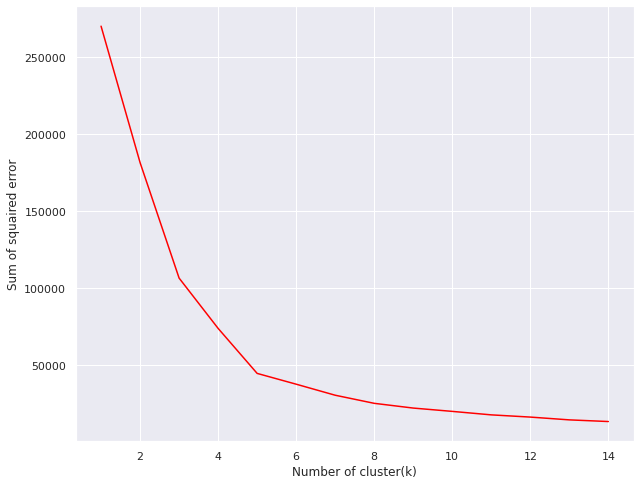

In [35]:
plt.figure(figsize=(10,8))
plt.plot(k_range,wcss,color="red")
plt.xlabel("Number of cluster(k)")
plt.ylabel("Sum of squaired error")
plt.show()